In [24]:
import os
import shutil
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### preparing data into directories

Directories for the training, validation and test splits

In [2]:
full_data_dir = '../data/CatVsDogs/train'
base_dir = '../data/cat&dogs'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)

Directory with training cat pictures

In [3]:
train_cat_dir = os.path.join(train_dir, 'cat')
os.mkdir(train_cat_dir)

Directory with training dog pictures

In [4]:
train_dog_dir = os.path.join(train_dir, 'dog')
os.mkdir(train_dog_dir)

Directory with validation cat pictures

In [5]:
val_cat_dir = os.path.join(val_dir, 'cat')
os.mkdir(val_cat_dir)

Directory with validation dog pictures

In [6]:
val_dog_dir = os.path.join(val_dir, 'dog')
os.mkdir(val_dog_dir)

Directory with testing cat pictures

In [7]:
test_cat_dir = os.path.join(test_dir, 'cat')
os.mkdir(test_cat_dir)

Directory with testing dog pictures

In [8]:
test_dog_dir = os.path.join(test_dir, 'dog')
os.mkdir(test_dog_dir)

### Putting images to folders

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)

### creating network

In [18]:
network = Sequential()

network.add(Conv2D(32, (3, 3), activation=relu, input_shape=(150, 150, 3)))
network.add(MaxPooling2D((2, 2)))

network.add(Conv2D(64, (3, 3), activation=relu))
network.add(MaxPooling2D((2, 2)))

network.add(Conv2D(128, (3, 3), activation=relu))
network.add(MaxPooling2D((2, 2)))

network.add(Conv2D(128, (3, 3), activation=relu))
network.add(MaxPooling2D((2, 2)))

network.add(Flatten())
network.add(Dense(units=512, activation=relu))
network.add(Dense(units=1, activation=sigmoid))

network.compile(optimizer=RMSprop(),
                loss=binary_crossentropy,
                metrics=[binary_accuracy])

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

### Data preprocessing

In [20]:
# rescale all images to 0 - 1
train_data_gen = ImageDataGenerator(rescale=1. / 255)
test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     batch_size=20,
                                                     class_mode='binary')
validation_generator = test_data_gen.flow_from_directory(directory=val_dir,
                                                         target_size=(150, 150),
                                                         batch_size=20,
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = network.fit_generator(generator=train_generator,
                                steps_per_epoch=100,
                                epochs=30,
                                validation_data=validation_generator,
                                validation_steps=50)

C:\Users\hewar\AppData\Local\Temp/ipykernel_6436/3791249013.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(generator=train_generator,


Epoch 1/30
100/100 [==============================] - 30s 196ms/step - loss: 0.7605 - binary_accuracy: 0.5445 - val_loss: 0.6906 - val_binary_accuracy: 0.5160
Epoch 2/30
100/100 [==============================] - 10s 96ms/step - loss: 0.6767 - binary_accuracy: 0.6175 - val_loss: 0.6322 - val_binary_accuracy: 0.6450
Epoch 3/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6124 - binary_accuracy: 0.6565 - val_loss: 0.6293 - val_binary_accuracy: 0.6630
Epoch 4/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5605 - binary_accuracy: 0.7200 - val_loss: 1.0605 - val_binary_accuracy: 0.5920
Epoch 5/30
100/100 [==============================] - 10s 95ms/step - loss: 0.5373 - binary_accuracy: 0.7520 - val_loss: 0.6024 - val_binary_accuracy: 0.6940
Epoch 6/30
100/100 [==============================] - 9s 94ms/step - loss: 0.4754 - binary_accuracy: 0.7780 - val_loss: 0.6451 - val_binary_accuracy: 0.6990
Epoch 7/30
100/100 [==============================] -

In [22]:
network.save('../models/cats_and_dogs_1.h5')

Displaying curves of loss and accuracy during training

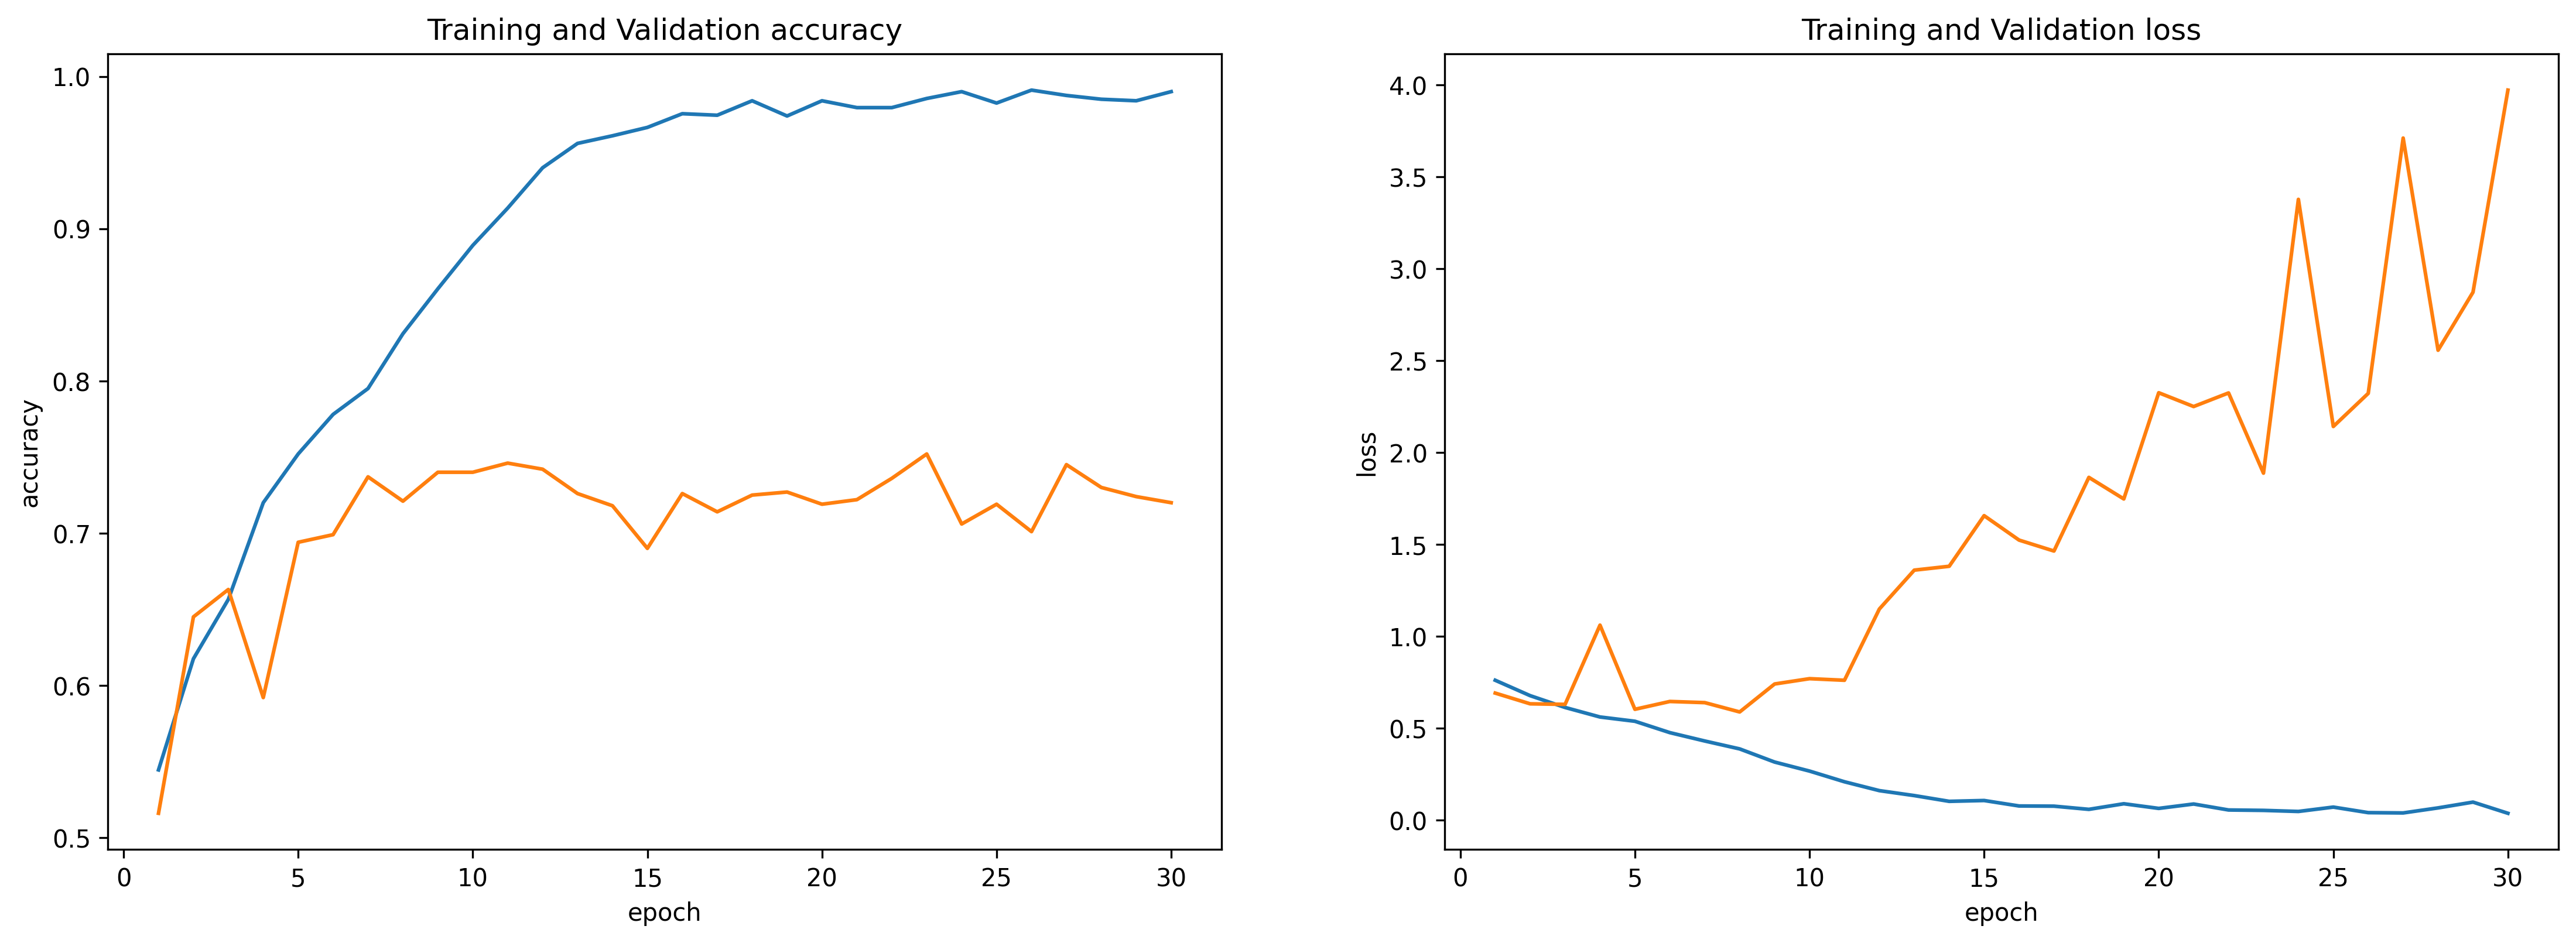

In [29]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(1, 31))

sns.lineplot(x=epochs, y=history.history['binary_accuracy'], ax=axes[0])
sns.lineplot(x=epochs, y=history.history['val_binary_accuracy'], ax=axes[0])
axes[0].set_title('Training and Validation accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')

sns.lineplot(x=epochs, y=history.history['loss'], ax=axes[1])
sns.lineplot(x=epochs, y=history.history['val_loss'], ax=axes[1])
axes[1].set_title('Training and Validation loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')
plt.show()